### Packages and Libraries

In [1]:
# import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
## Factor Analyzer installation may be required
#!pip install factor-analyzer

# 1 Clustering

### 1.1 Data Set:

Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc. (4)

For this excercise the 'Clustering Clean Ads_Data-2.xlsx' shall be used provided as part of project.

In [3]:
os.chdir('C:/Users/lsreeram/Downloads/_/GL/04 Data Mining/Final')

In [4]:
ads_df = pd.read_excel('Clustering Clean Ads_Data-2.xlsx')
ads_df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [5]:
ads_df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [6]:
ads_df.shape

(23066, 19)

In [7]:
ads_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


Based on above description of data, it is evident that data is not scaled. Scaling shall be required.

In [8]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

Assigned Data types are good. Next, check for duplicates in dataset, followed by missing values.

In [9]:
ads_df.duplicated().sum()

0

In [10]:
ads_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

3 columns namely CTR, CPM, CPC have missing values

### 1.2 Treating missing values:

Clustering: Treat missing values in CPC, CTR and CPM using the formula given. (4)

Calculate the values of CPM, CPC, CTR based on below provided information:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.

In [11]:
def calculate_cpm(x):
    spend =ads_df.Spend
    impressions=ads_df.Impressions
    cpm = (spend/impressions)*1000
    return cpm

In [12]:
def calculate_cpc(x):
    spend =ads_df.Spend
    clicks=ads_df.Clicks
    cpc = spend/clicks
    return cpc

In [13]:
def calculate_ctr(x):
    clicks=ads_df.Clicks
    impressions=ads_df.Impressions
    ctr = (clicks/impressions)*100
    return ctr

In [14]:
ads_df['CPM']= ads_df[['CPM']].apply(lambda x: calculate_cpm(x))
ads_df['CPC']= ads_df[['CPC']].apply(lambda x: calculate_cpc(x))
ads_df['CTR']= ads_df[['CTR']].apply(lambda x: calculate_ctr(x))

In [15]:
ads_df.tail(3)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.0,50.0,0.05
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,50.0,45.0,0.09


In [16]:
ads_df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [17]:
ads_new_df = ads_df.drop(['Timestamp', 'InventoryType','Ad Type', 'Platform','Device Type', 'Format'], axis = 1)

In [18]:
ads_new_df.tail()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.0,20.0,0.04
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.0,50.0,0.05
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07
23065,720,300,216000,2,2,2,1,0.09,0.35,0.0585,50.0,45.0,0.09


In [19]:
ads_new_df.shape

(23066, 13)

New dataset is created with relevant variables for clustering. There are no more missing values.

### 1. 3 Outliers
Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst). (3)

Check for presence of outliers in each feature

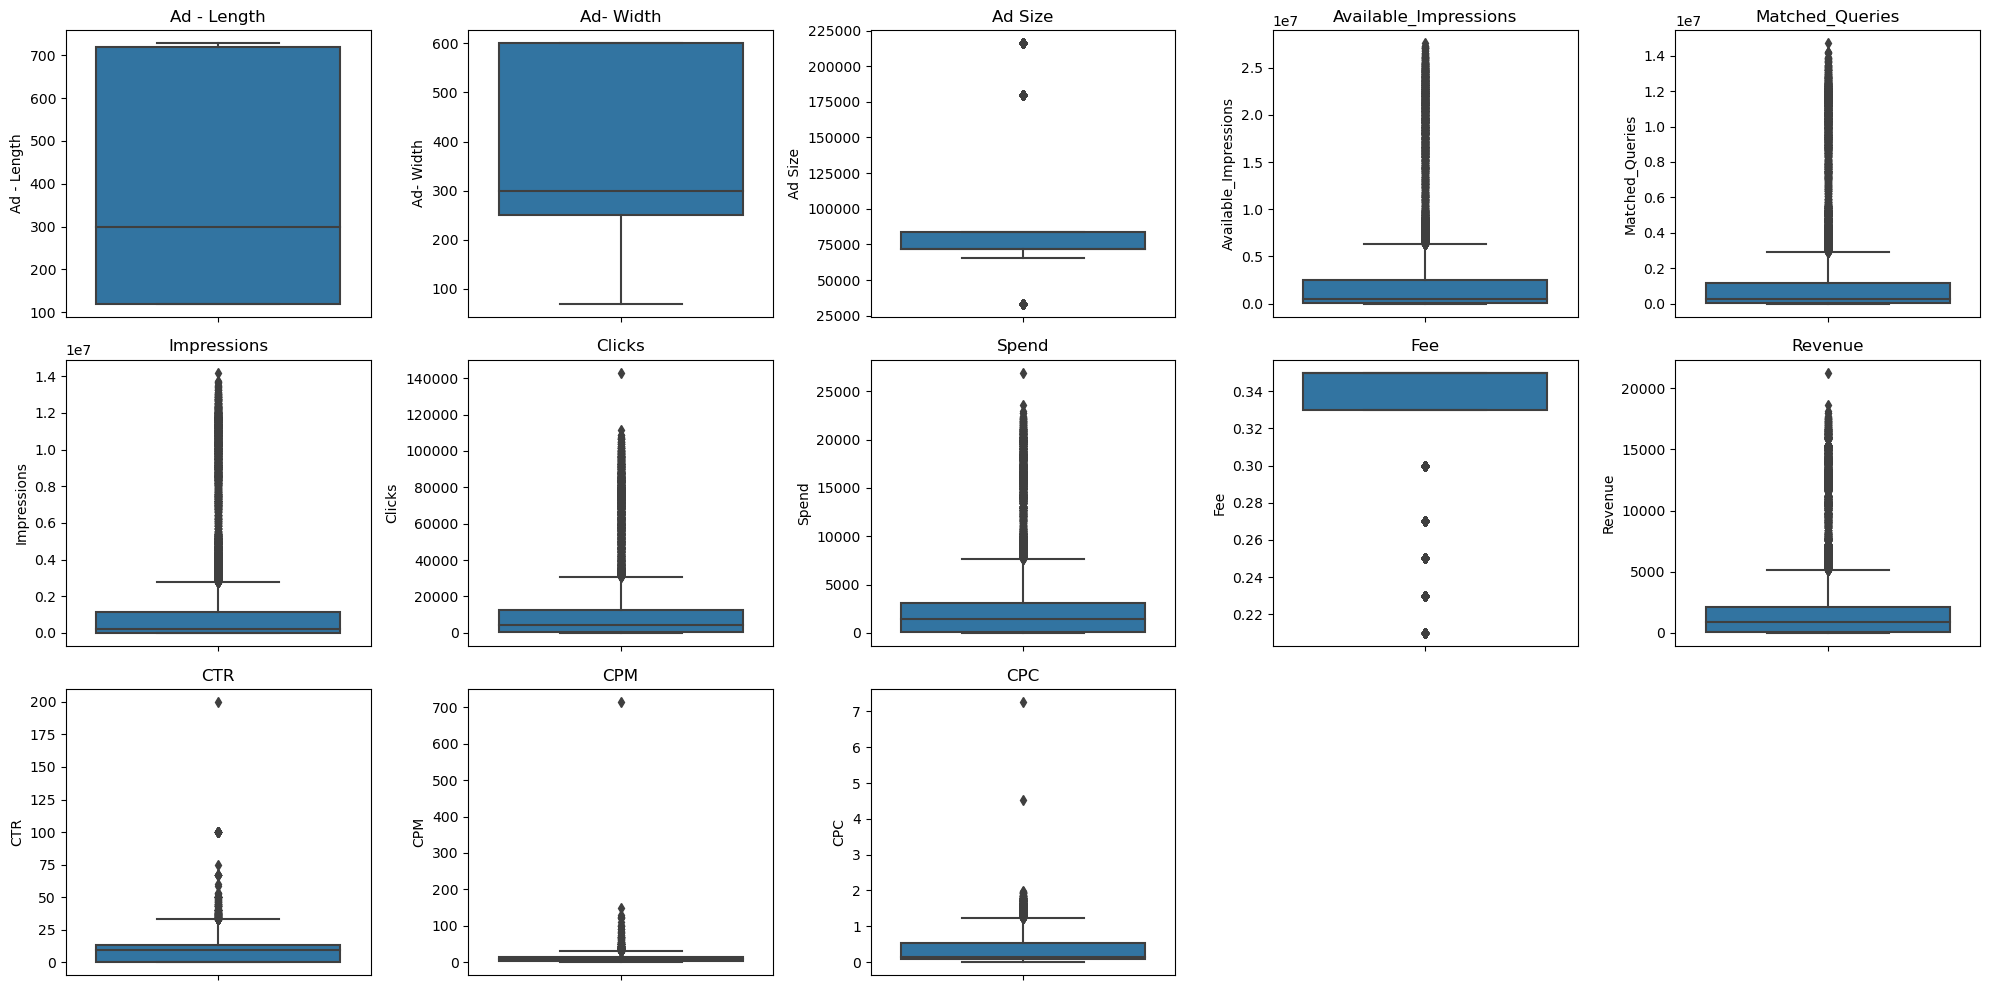

In [20]:
plt.figure(figsize = (20,10))
feature_list = ads_new_df.columns
for i in range(len(feature_list)):
    plt.subplot(3,5, i + 1)
    sns.boxplot(y = ads_new_df[feature_list[i]], data = ads_new_df)
    #plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.title(feature_list[i])
    plt.tight_layout()

There are outliers in many features.

A major problem with K-Means is that K-means is sensitive to outliers. What does this mean?

Well, if there is a single point that is too far away from the rest, it will always be placed in its own one-point cluster.
Such a data point is so far away from the rest of the data that it is destined to be in its own cluster. The remedy, just get rid of outliers prior to clustering.

Alternatively, if you do the clustering and spot one-point clusters, remove them and cluster again.

In [21]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25, 0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [22]:
for i in ads_new_df.columns:
    LL,UL=remove_outlier(ads_new_df[i])
    ads_new_df[i] = np.where(ads_new_df[i] > UL, UL, ads_new_df[i])
    ads_new_df[i] = np.where(ads_new_df[i] < LL, LL, ads_new_df[i])

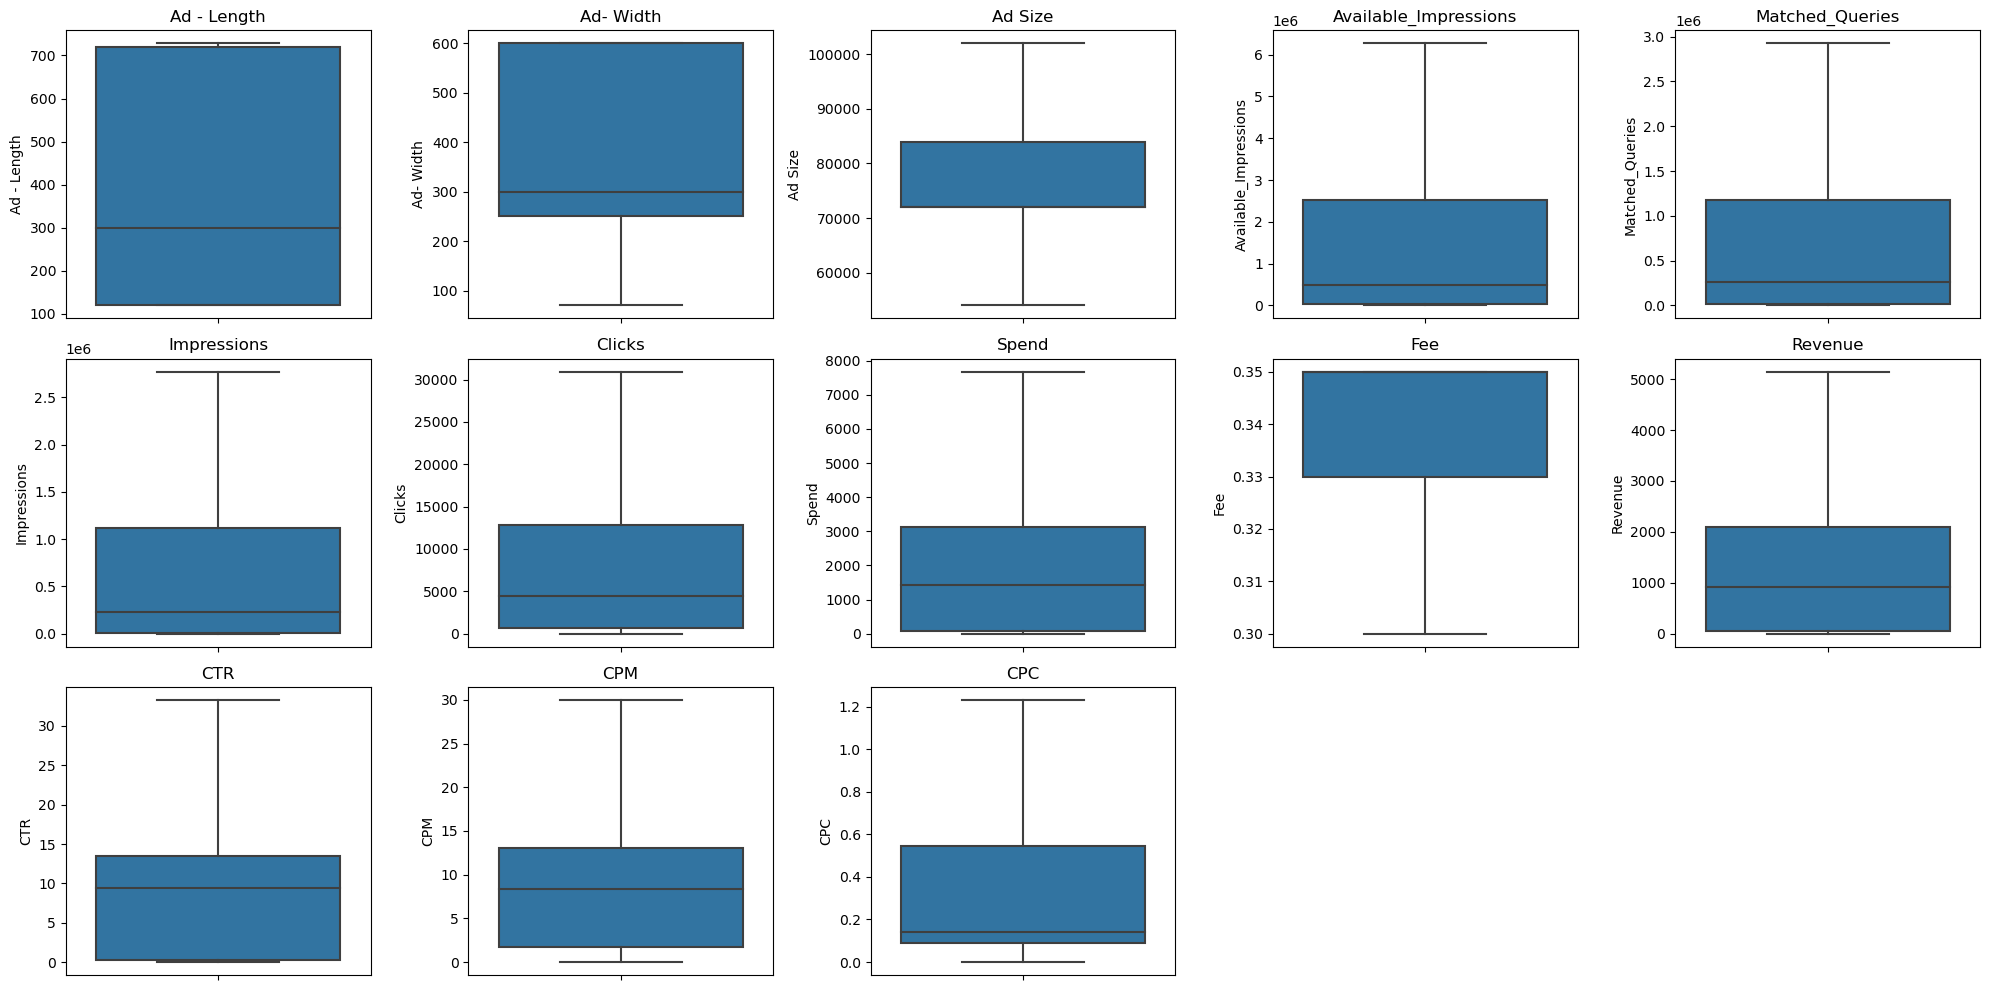

In [23]:
plt.figure(figsize = (20,10))
for i in range(len(ads_new_df.columns)):
    plt.subplot(3,5, i+1)
    sns.boxplot(y = ads_new_df[ads_new_df.columns[i]], data = ads_new_df)
    plt.title(ads_new_df.columns[i])
    plt.tight_layout()

There are no outliers in the above boxplot.

In [24]:
ads_new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,7.657684e+04,1.538132e+04,54000.000000,72000.000000,72000.000000,8.400000e+04,1.020000e+05
Available_Impressions,23066.0,1.607253e+06,2.125528e+06,1.000000,33672.250000,483771.000000,2.527712e+06,6.268771e+06
Matched_Queries,23066.0,7.995380e+05,1.026037e+06,1.000000,18282.500000,258087.500000,1.180700e+06,2.924326e+06
Impressions,23066.0,7.536120e+05,9.802568e+05,1.000000,7990.500000,225290.000000,1.112428e+06,2.769086e+06
Clicks,23066.0,8.306828e+03,9.574779e+03,1.000000,710.000000,4425.000000,1.279375e+04,3.091938e+04
Spend,23066.0,2.166060e+03,2.425190e+03,0.000000,85.180000,1425.125000,3.121400e+03,7.675730e+03
Fee,23066.0,3.402883e-01,1.812855e-02,0.300000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.449389e+03,1.646894e+03,0.000000,55.365375,926.335000,2.091338e+03,5.145297e+03


### 1.4 Z-Score
Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm. (3)

In [25]:
#Scale the data
#from scipy.stats import zscore
ads_scaled_df = ads_new_df.apply(zscore)

In [26]:
ads_scaled_df

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.893170,0.535724,-0.880093,-0.958836,-1.194498,-1.042561
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.893170,0.535724,-0.880093,-0.953835,-1.194498,-1.042561
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.893170,0.535724,-0.880093,-0.962218,-1.194498,-1.042561
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.893170,0.535724,-0.880093,-0.971871,-1.194498,-1.042561
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.893170,0.535724,-0.880093,-0.946281,-1.194498,-1.042561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,1.433093,-0.186599,1.652896,-0.756182,-0.779265,-0.768806,-0.867488,-0.893141,0.535724,-0.880066,3.035808,3.162718,-0.821435
23062,1.433093,-0.186599,1.652896,-0.756181,-0.779264,-0.768805,-0.867488,-0.893154,0.535724,-0.880078,3.035808,1.712113,-0.916204
23063,1.433093,-0.186599,1.652896,-0.756182,-0.779265,-0.768806,-0.867488,-0.893150,0.535724,-0.880074,3.035808,3.162718,-0.884614
23064,-1.134891,1.290590,-0.297564,-0.756179,-0.779265,-0.768806,-0.867488,-0.893141,0.535724,-0.880066,3.035808,3.162718,-0.821435


### 1.5 Clustering

Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance. (4)

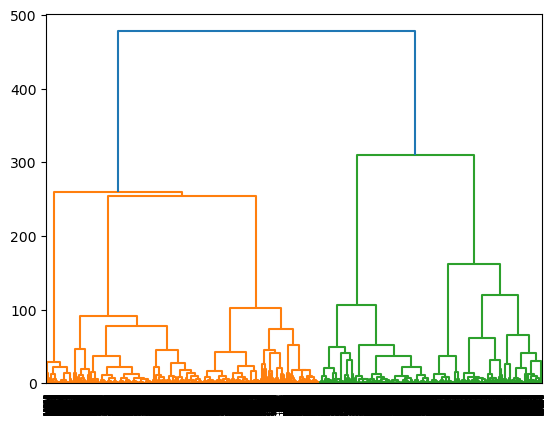

In [27]:
#from scipy.cluster.hierarchy import dendrogram,linkage
wardlink = linkage(ads_scaled_df, method='ward', metric='euclidean')
dend = dendrogram(wardlink)

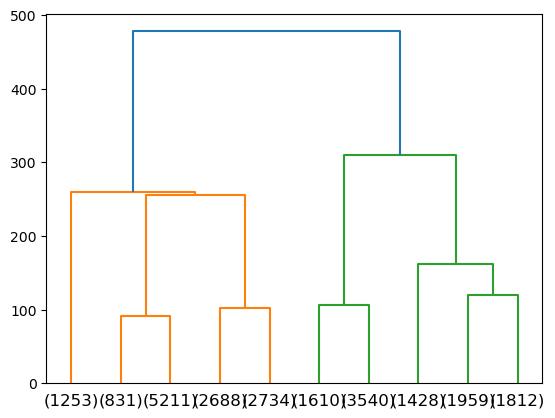

In [28]:
#Show last p  merges, setting p-10
dend = dendrogram(wardlink, truncate_mode='lastp', p=10)

In [29]:
#Assign cluster to records using fcluster
#Method1
clusters = fcluster(wardlink, 5, criterion='maxclust')
clusters

array([4, 4, 4, ..., 3, 2, 3], dtype=int32)

In [30]:
#ads_df['Hierarchical_Clusters']=clusters
#ads_df.head(3)

### 1.6 Elbow Point
Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm. (4)

In [31]:
#from sklearn.cluster import KMeans
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(ads_scaled_df)
    wss.append(KM.inertia_)
wss

[299857.99999999994,
 183349.1043840474,
 130878.35297256615,
 95133.93066619664,
 61539.18919785384,
 51676.89230709958,
 44598.26542015258,
 39597.853398597494,
 36319.70354910326,
 32998.65299105376]

Most data can be captured in 5 clusters, plotting below to see elbow point.

Text(0.5, 1.0, 'Inertia vs K Value')

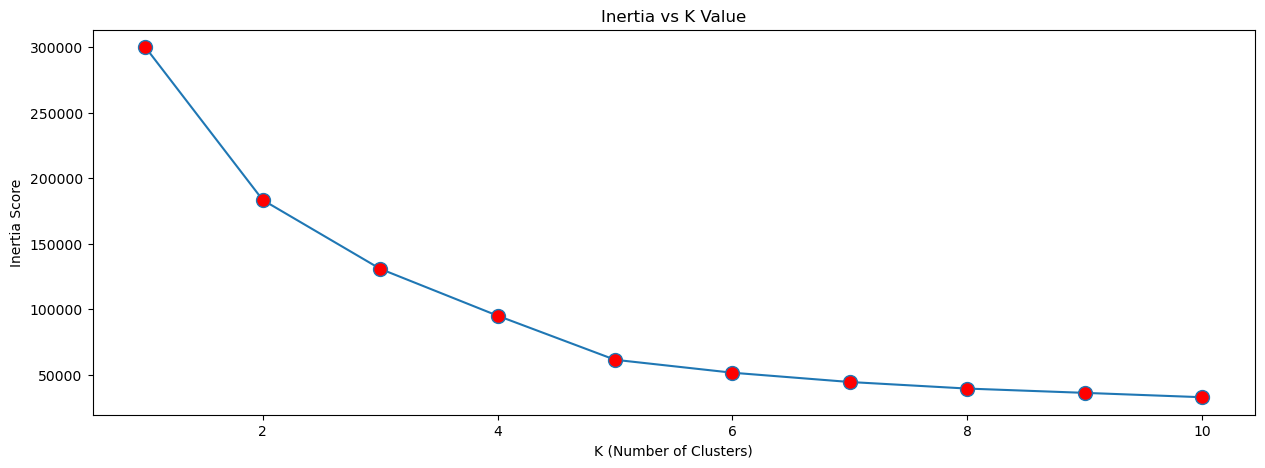

In [32]:
plt.figure(figsize=(15,5))
plt.plot(range(1,11), wss, marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('K (Number of Clusters)')
plt.ylabel('Inertia Score')
plt.title('Inertia vs K Value')

We have a very distinct elbow point here and generally distinct elbows rarely come out in actual data. The the optimum value of k can be 5 from above plot as inertia continuous to drop steeply at least till k=4.

We can use silhouette score, which is another cluster quality measure, to choose the best k among 4–6. We can also take business inputs here to determine what would be a practical value of k.

Once we have determined the value of k, we generate the final clustering object and save it for scoring process. We will also get the cluster labels for all the records and save it.

### 1.7 Silehoutte
Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters. (4)

In [33]:
sil_df=pd.DataFrame()
sil_scores = []
sil_min_scores=[]
print('Printing the Silhouette Scores for the k clusters below: ')
print('')

for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(ads_scaled_df)
    labels =KM.labels_
    
    #Calculate and Print Silhoutte Score
    sil_score = silhouette_score(ads_scaled_df,labels)
    
    print('Silhoutte Score for {0} clusters is: {1}'.format(i, sil_score))
    sil_scores.append(sil_score)
    
    #Calculate and Print Silhouette Minimum Score:
    sil_min_score = silhouette_samples(ads_scaled_df,labels).min()
    sil_min_scores.append(sil_min_score)
    
    #Assign Cluster Silhouette Widths of K clusters to original dataframe

    #sil_width = silhouette_samples(ads_scaled_df,labels)
    #ads_df[i]=sil_width
    
    #Assign Cluster Labels of K Clusters to original datarame
    #ads_df['Clusters_KMeans_{0}'.format(i)] = labels   

Printing the Silhouette Scores for the k clusters below: 

Silhoutte Score for 2 clusters is: 0.38572769619101077
Silhoutte Score for 3 clusters is: 0.3825486036570082
Silhoutte Score for 4 clusters is: 0.44534519247649795
Silhoutte Score for 5 clusters is: 0.5240956940501831
Silhoutte Score for 6 clusters is: 0.5221495642670937
Silhoutte Score for 7 clusters is: 0.5165635029478517
Silhoutte Score for 8 clusters is: 0.47977121134288836
Silhoutte Score for 9 clusters is: 0.4324599214326144
Silhoutte Score for 10 clusters is: 0.4363034879746105


In [34]:
sil_scores

[0.38572769619101077,
 0.3825486036570082,
 0.44534519247649795,
 0.5240956940501831,
 0.5221495642670937,
 0.5165635029478517,
 0.47977121134288836,
 0.4324599214326144,
 0.4363034879746105]

In [35]:
sil_min_scores

[-0.052971575130041706,
 -0.13228597797973302,
 -0.1357679674165574,
 -0.03709167751991964,
 -0.05669954399828332,
 -0.04895751557522969,
 -0.19916713991920929,
 -0.2769564236450726,
 -0.2833340504476402]

The Silhouette scores are visualized in plot below.

Text(0.5, 1.0, 'Silhouette Score vs K Value')

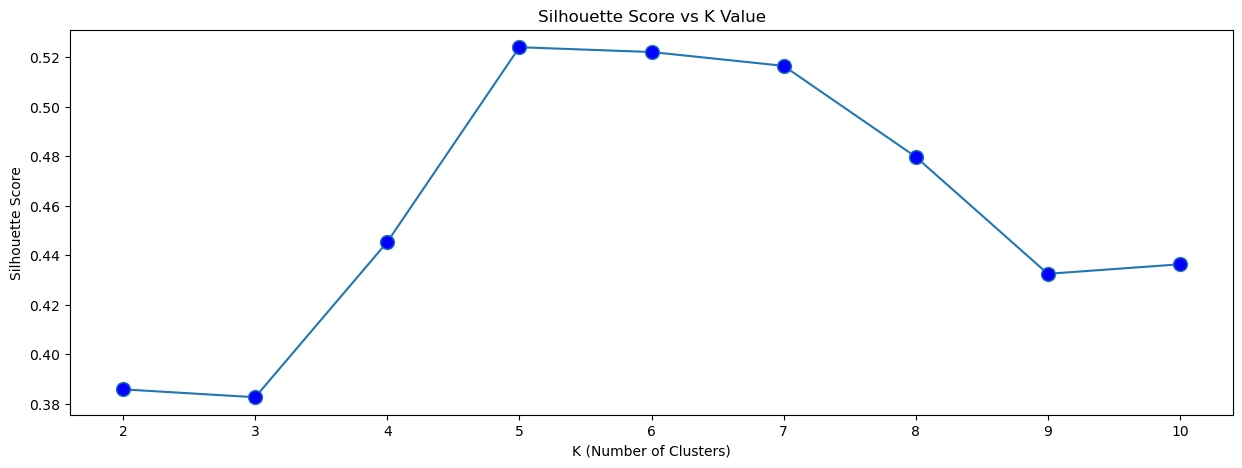

In [36]:
plt.figure(figsize=(15,5))
plt.plot(range(2,11), sil_scores, marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('K (Number of Clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K Value')

In [37]:
ads_df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0


In [38]:
sil_score = silhouette_score(ads_scaled_df,labels)
sil_score

0.4363034879746105

In [39]:
sil_min = silhouette_samples(ads_scaled_df,labels).min()
sil_min

-0.2833340504476402

In [40]:
ads_df.head(3)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0


### 1.8 Profiling

Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots (4)

In [41]:
#Kmeans k value determination
k_means = KMeans(n_clusters=5)
k_means.fit(ads_scaled_df)
labels = k_means.labels_
labels

array([0, 0, 0, ..., 4, 1, 4])

In [42]:
ads_df['Kmeans_Clusters']=labels
ads_df.head(3)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Kmeans_Clusters
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,0


In [43]:
ads_df['Kmeans_Clusters'].value_counts().sort_index()

0    6275
1    6524
2    4054
3    1537
4    4676
Name: Kmeans_Clusters, dtype: int64

In [44]:
clust_profile = ads_df.drop(['Timestamp', 'InventoryType','Ad Type', 'Platform','Device Type', 'Format'], axis = 1)
clust_profile=ads_df.groupby('Kmeans_Clusters').mean()
clust_profile['freq']=ads_df['Kmeans_Clusters'].value_counts().sort_index()
clust_profile

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,freq
Kmeans_Clusters,,,,,,,,,,,,,,
0,421.696255,152.001594,55008.841434,1.810314e+06,8.642623e+05,8.262209e+05,3263.131952,1500.090563,0.349264,977.424163,0.404392,1.788731,0.544614,6275
1,143.280809,572.103004,76597.026364,3.209356e+04,1.962406e+04,1.349204e+04,1914.448804,209.162609,0.349988,135.993379,16.037897,14.693481,0.102794,6524
2,465.781944,199.148989,75176.566354,1.038821e+07,5.625808e+06,5.447310e+06,11245.754810,8646.647997,0.290439,6373.659814,0.217242,1.573280,0.760929,4054
3,141.454782,572.446324,75614.834092,8.063284e+05,5.668641e+05,4.781485e+05,65315.176318,6990.360898,0.288302,5017.538285,13.752664,15.385753,0.111918,1537
4,683.825492,303.785287,206160.821215,2.513465e+05,1.375509e+05,1.167714e+05,14406.540205,1252.285569,0.349538,815.541831,13.857220,12.098200,0.090012,4676


In [46]:
ads_df.to_csv('Ads_Clusters.csv')

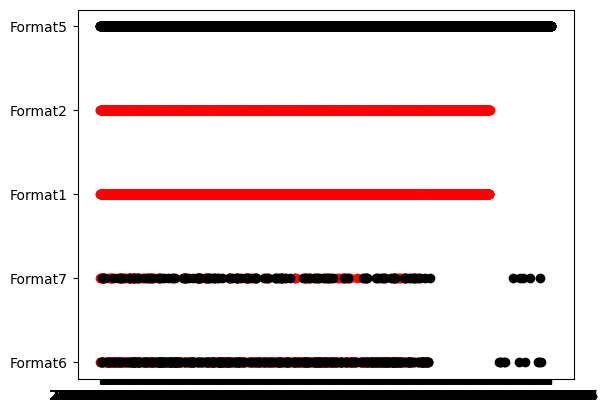

In [47]:
#Filtering for unique labels
 
u_labels = np.unique(labels)

#filter rows of original data
filtered_label0 = ads_df[labels == 0]

#filter rows of original data
filtered_label2 = ads_df[labels == 2].values
 
filtered_label8 = ads_df[labels == 4].values

#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

### 1.9 Clustering Conclusion
Clustering: Conclude the project by providing summary of your learnings. (3)

Refer to Business Report.

# 2 PCA:

### 2.1 Part 2 - PCA: Dataset
    
Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc. (4)

For this excercise the 'PCA India Data_Census.xlsx' shall be used provided as part of project.

In [48]:
os.chdir('C:/Users/lsreeram/Downloads/_/GL/04 Data Mining/Final')

In [49]:
df=pd.read_excel('PCA India Data_Census.xlsx')

In [50]:
df.shape

(640, 61)

In [51]:
df.head(3)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


Observation: Data is not scaled already.

In [54]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [55]:
df.duplicated().sum()

0

### 2.2 Part 2 - PCA: EDA

Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

(6)

SEX RATIO at BIRTH is the number of resident male live births (for a specific geography such as country, state or county for a specified time period, usually a calendar year) divided by the number of resident female live births (for the same geography and time period) and multiplied by 100 or 1,000. 3.

In [56]:
df_eda = df.loc[:, ['State', 'Area Name','TOT_F', 'TOT_M', 'F_LIT' ,'M_LIT', 'TOT_WORK_F','TOT_WORK_M']]
df_eda.head(3)

,State,Area Name,TOT_F,TOT_M,F_LIT,M_LIT,TOT_WORK_F,TOT_WORK_M
0,Jammu & Kashmir,Kupwara,29796,23388,11364,13381,3752,6723
1,Jammu & Kashmir,Badgam,23102,19585,7891,10513,4200,6982
2,Jammu & Kashmir,Leh(Ladakh),10964,6546,5840,4534,4800,2775


In [82]:
df_eda_1=df_eda.groupby('State').sum()
df_eda_1['No Of Districts']=df_eda['State'].value_counts().sort_index()
df_eda_1['Gender Ratio M/F'] = df_eda_1['TOT_M']/df_eda_1['TOT_F']
df_eda_1.head(5)

,TOT_F,TOT_M,F_LIT,M_LIT,TOT_WORK_F,TOT_WORK_M,No Of Districts,Gender Ratio M/F
State,,,,,,,,
Andaman & Nicobar Island,28691,18726,20237,15488,8483,9767,3,0.652679
Andhra Pradesh,6097235,3274363,2678603,2372971,2833719,1674517,23,0.537024
Arunachal Pradesh,88066,50582,45307,33965,41394,15841,16,0.574365
Assam,2093432,1437268,1152979,1023294,705299,744397,27,0.686561
Bihar,5405883,4025198,2197931,2408492,1464147,1524553,38,0.744596


In [84]:
for i in df_eda_1.columns:
    
    min_val=df_eda_1[i].min()
    max_val=df_eda_1[i].max()
    
    min_ind = df_eda_1[i].idxmin()    
    max_ind = df_eda_1[i].idxmax()    
    print("{1} State/UT has Lowest Value of {2} for {0} column".format(i,min_ind,min_val))
    print("{1} State/UT has Highest Value of {2} for {0} column".format(i,max_ind,max_val))
    print(' ')

Dadara & Nagar Havelli State/UT has Lowest Value of 10831 for TOT_F column
Uttar Pradesh State/UT has Highest Value of 12023885 for TOT_F column
 
Dadara & Nagar Havelli State/UT has Lowest Value of 6982 for TOT_M column
Uttar Pradesh State/UT has Highest Value of 9043969 for TOT_M column
 
Dadara & Nagar Havelli State/UT has Lowest Value of 5308 for F_LIT column
Uttar Pradesh State/UT has Highest Value of 5574752 for F_LIT column
 
Dadara & Nagar Havelli State/UT has Lowest Value of 5119 for M_LIT column
Uttar Pradesh State/UT has Highest Value of 6016402 for M_LIT column
 
Lakshadweep State/UT has Lowest Value of 1780 for TOT_WORK_F column
Uttar Pradesh State/UT has Highest Value of 2972243 for TOT_WORK_F column
 
Dadara & Nagar Havelli State/UT has Lowest Value of 3138 for TOT_WORK_M column
Uttar Pradesh State/UT has Highest Value of 3710433 for TOT_WORK_M column
 
Chandigarh State/UT has Lowest Value of 1 for No Of Districts column
Uttar Pradesh State/UT has Highest Value of 71 for

(i) Which state has highest gender ratio and which has the lowest?

Based on above EDA:

Andhra Pradesh State/UT has Lowest Value of 0.5370242413159407 for Gender Ratio M/F column.

Lakshadweep State/UT has Highest Value of 0.8680611968589222 for Gender Ratio M/F column

In [92]:
df_eda_dist = df.loc[:, ['Area Name','TOT_F', 'TOT_M', 'F_LIT' ,'M_LIT', 'TOT_WORK_F','TOT_WORK_M']]
df_eda_dist.set_index('Area Name',inplace=True)
df_eda_dist['Gender Ratio M/F'] = df_eda_1['TOT_M']/df_eda_1['TOT_F']
df_eda_dist

,TOT_F,TOT_M,F_LIT,M_LIT,TOT_WORK_F,TOT_WORK_M,Gender Ratio M/F
Area Name,,,,,,,
Kupwara,29796,23388,11364,13381,3752,6723,NaN
Badgam,23102,19585,7891,10513,4200,6982,NaN
Leh(Ladakh),10964,6546,5840,4534,4800,2775,NaN
Kargil,4206,2784,1962,1842,1118,1002,NaN
Punch,29981,20591,13477,13243,7692,5717,NaN
...,...,...,...,...,...,...,...
Mahe,11781,8154,10184,6916,1328,3808,NaN
Karaikal,21691,12346,14225,10292,5286,6458,NaN
Nicobars,2630,1549,1602,1187,1031,715,NaN


In [94]:
for i in df_eda_dist.columns:
    
    min_val=df_eda_dist[i].min()
    max_val=df_eda_dist[i].max()
    
    min_ind = df_eda_dist[i].idxmin()    
    max_ind = df_eda_dist[i].idxmax()    
    print("{1} Area has Lowest Value of {2} for {0} column".format(i,min_ind,min_val))
    print("{1} Area has Highest Value of {2} for {0} column".format(i,max_ind,max_val))
    print(' ')

Dibang Valley Area has Lowest Value of 698 for TOT_F column
Mumbai Suburban Area has Highest Value of 750392 for TOT_F column
 
Dibang Valley Area has Lowest Value of 391 for TOT_M column
Mumbai Suburban Area has Highest Value of 485417 for TOT_M column
 
Dibang Valley Area has Lowest Value of 371 for F_LIT column
Malappuram Area has Highest Value of 571140 for F_LIT column
 
Dibang Valley Area has Lowest Value of 286 for M_LIT column
Mumbai Suburban Area has Highest Value of 403261 for M_LIT column
 
Dibang Valley Area has Lowest Value of 357 for TOT_WORK_F column
Bangalore Area has Highest Value of 257848 for TOT_WORK_F column
 
Dibang Valley Area has Lowest Value of 100 for TOT_WORK_M column
North Twenty Four Parganas Area has Highest Value of 269422 for TOT_WORK_M column
 
Puducherry Area has Lowest Value of 0.5911114097116079 for Gender Ratio M/F column
Lakshadweep Area has Highest Value of 0.8680611968589222 for Gender Ratio M/F column
 


(ii) Which district has the highest & lowest gender ratio?

Puducherry Area has Lowest Value of 0.5911114097116079 for Gender Ratio M/F column

Lakshadweep Area has Highest Value of 0.8680611968589222 for Gender Ratio M/F column

### 2.3 Part 2 - PCA: Outliers

We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary? (1)

In [57]:
df_pca = df.drop(['State', 'Area Name', 'Dist.Code', 'State Code'], axis=1)
df_pca.head(3)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61


In [58]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0
F_ST,640.0,10155.640625,15875.701488,0.0,429.50,3834.5,12480.25,130119.0
M_LIT,640.0,57967.979688,55910.282466,286.0,21298.00,42693.5,77989.50,403261.0


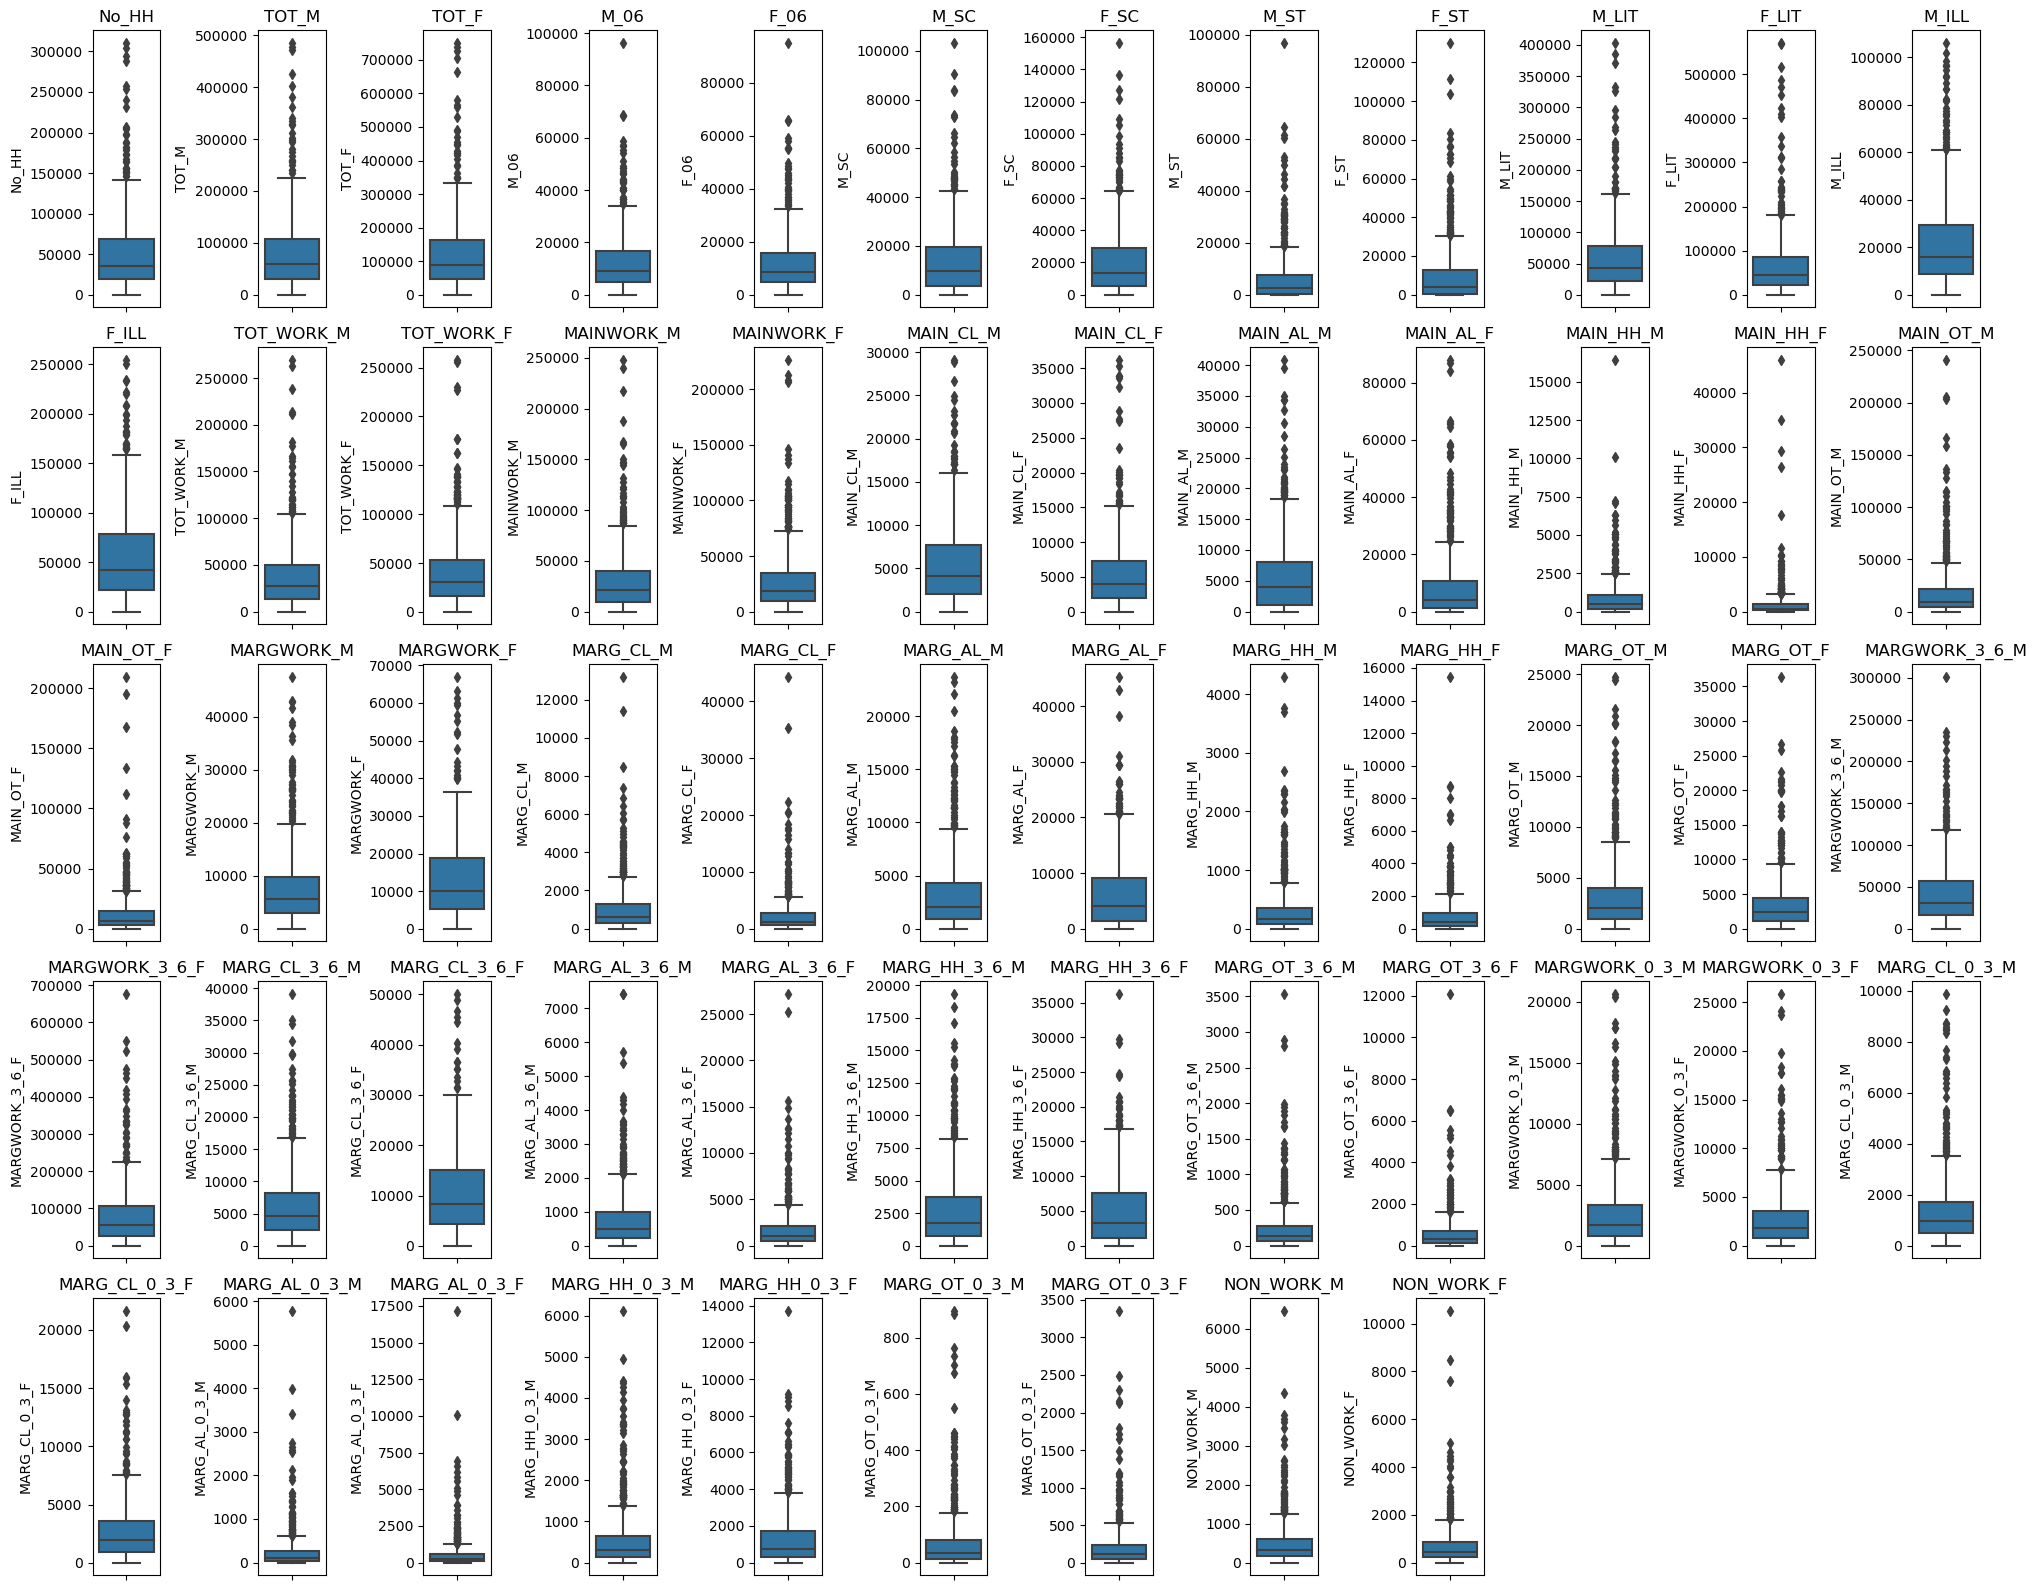

In [59]:
#Check for presence of outliers in each feature
plt.figure(figsize = (20,16))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(5,12, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('{}'.format(feature_list[i]))
    plt.tight_layout()

Z-score is a variation of scaling that represents the number of standard deviations away from the mean. You would use z-score to ensure your feature distributions have mean = 0 and std = 1. It's useful when there are a few outliers, but not so extreme that you need clipping.

### 2.4 Part 2 - PCA: Data Scaling
    
Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.    (3)

In [60]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [61]:
#Check the data post scaling
df_pca_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


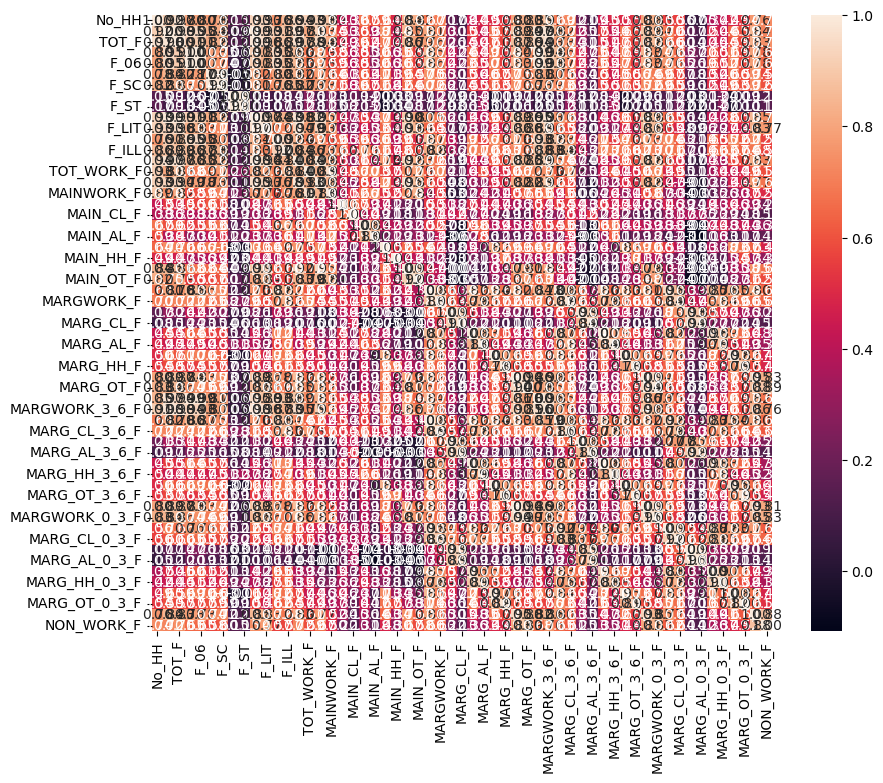

In [62]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(df_pca_scaled.corr(), annot=True,fmt='.2f');

### 2.5 Part 2 - PCA: Perform PCA 
Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.
(4)

In [63]:
df_pca_scaled.shape

(640, 57)

In [64]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

C:\ProgramData\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:108: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

In [65]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

C:\ProgramData\Anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8039889932781237

In [66]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [67]:
#Extract eigen vectors
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [-0.        , -0.17278849, -0.09520952, ...,  0.00987322,
        -0.04362296, -0.0207041 ],
       [-0.        , -0.0116324 , -0.0814326 , ...,  0.04647201,
        -0.17212428,  0.03763315],
       [ 0.        ,  0.18260602,  0.03874463, ..., -0.00370238,
        -0.05681626, -0.03729932]])

In [68]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

### 2.6 Part 2 - PCA: Identify PCA

Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot. (3)

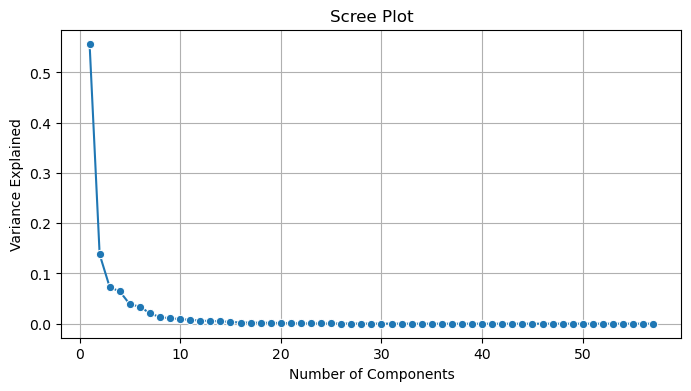

In [69]:
#Create a scree plot
plt.figure(figsize=(8,4))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [70]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
exp_var=np.cumsum(pca.explained_variance_ratio_)
exp_var

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

### 2.7 Part 2 - PCA: Inferences

Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables. (4)

In [71]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10',
                                               'PC11','PC12', 'PC13', 'PC14', 'PC15', 'PC16','PC17', 'PC18', 'PC19', 'PC20',
                                               'PC21','PC22', 'PC23', 'PC24', 'PC25', 'PC26','PC27', 'PC28', 'PC29', 'PC30',
                                               'PC31','PC32', 'PC33', 'PC34', 'PC35', 'PC36','PC37', 'PC38', 'PC39', 'PC40',
                                               'PC41','PC42', 'PC43', 'PC44', 'PC45', 'PC46','PC47', 'PC48', 'PC49', 'PC50',
                                               'PC51','PC52', 'PC53', 'PC54', 'PC55', 'PC56','PC57'],
                                    index = df_pca_scaled.columns)

In [72]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']]

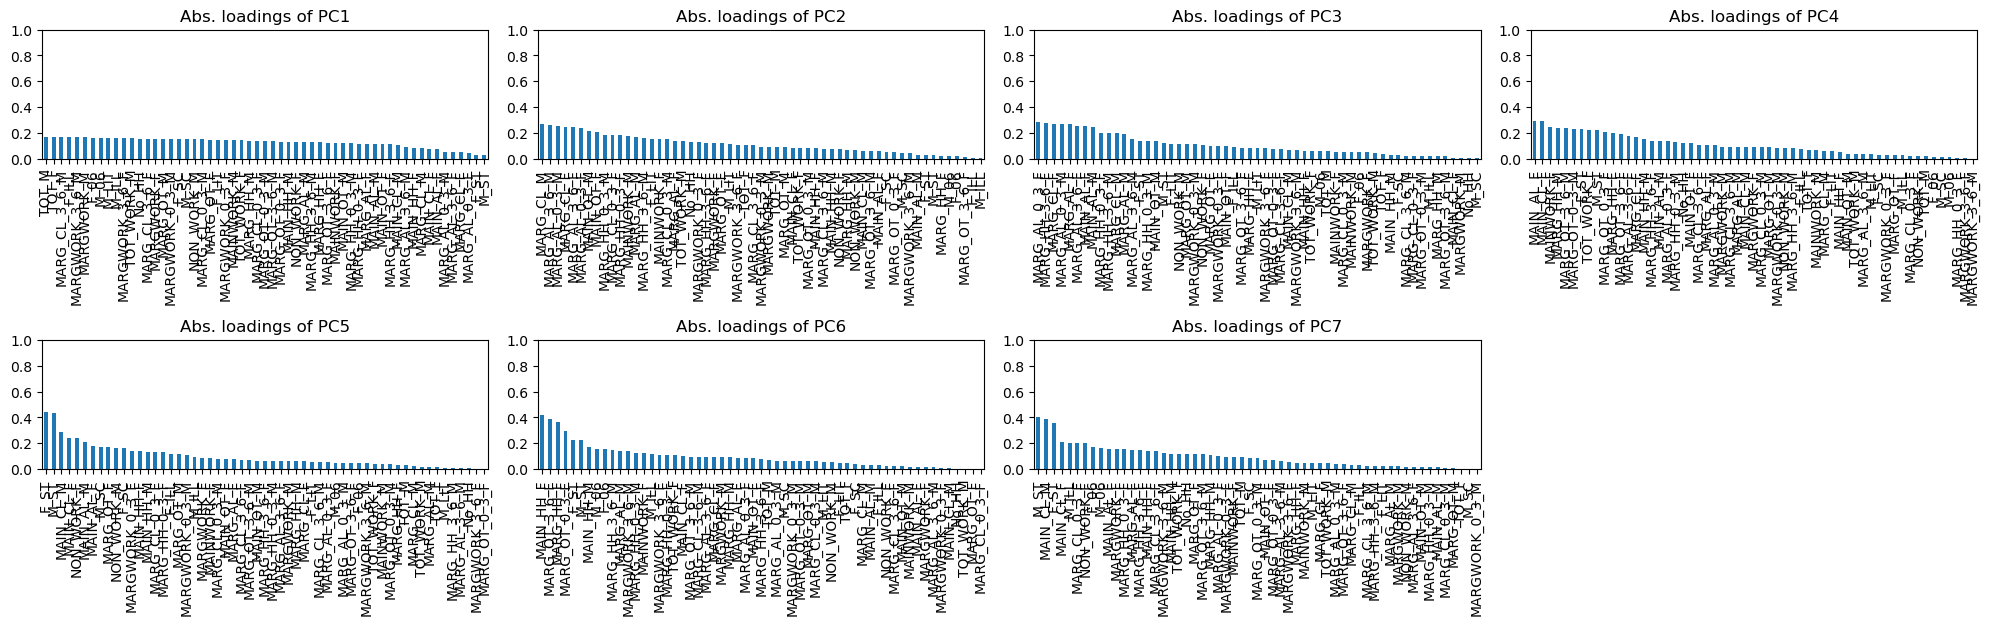

In [73]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (20,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,4,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

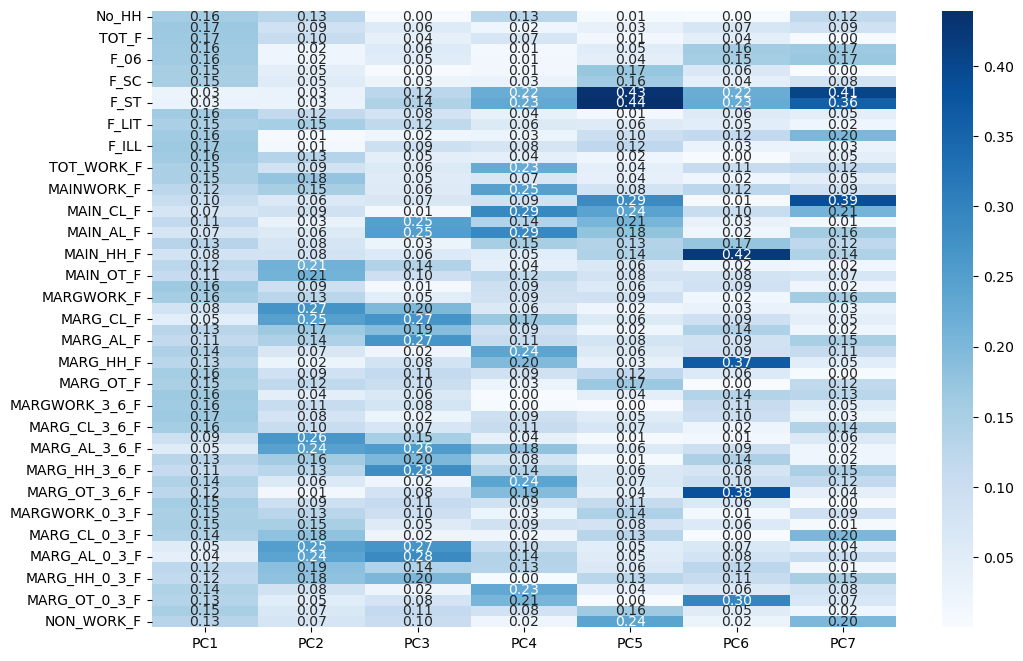

In [74]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [75]:
#In order to calculate PC scores we need loadings, below:
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934


In [76]:
#...and we need the original scaled features
df_pca_scaled.iloc[0]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [77]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-4.617263 0.138116 0.328545 1.543697 0.353737 -0.420947 -0.010393 

In [78]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=7, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [79]:
#Just create a dataframe out of fit_transformed scaled data above
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-4.617263,0.138116,0.328545,1.543697,0.353737,-0.420947,-0.010386
1,-4.771662,-0.105865,0.244449,1.963214,-0.153884,0.417310,-0.023121
2,-5.964836,-0.294347,0.367394,0.619542,0.478199,0.276581,0.069555
3,-6.280796,-0.500384,0.212701,1.074515,0.300799,0.051158,-0.250539
4,-4.478566,0.894154,1.078277,0.535556,0.804065,0.341676,-0.092335
5,-3.319963,2.823865,3.058459,-0.447905,0.742444,0.634671,-0.455693
6,-5.021393,-0.346359,0.650378,0.981072,-0.059778,-0.246957,-0.135019
7,-4.608709,0.022370,0.398755,1.576995,0.171317,-0.139443,-0.137576
8,-5.186703,-0.059097,0.184397,1.735440,0.169174,0.455040,-0.268002
9,-4.226190,-1.335080,0.697838,1.470509,0.269147,-0.002573,-0.248779


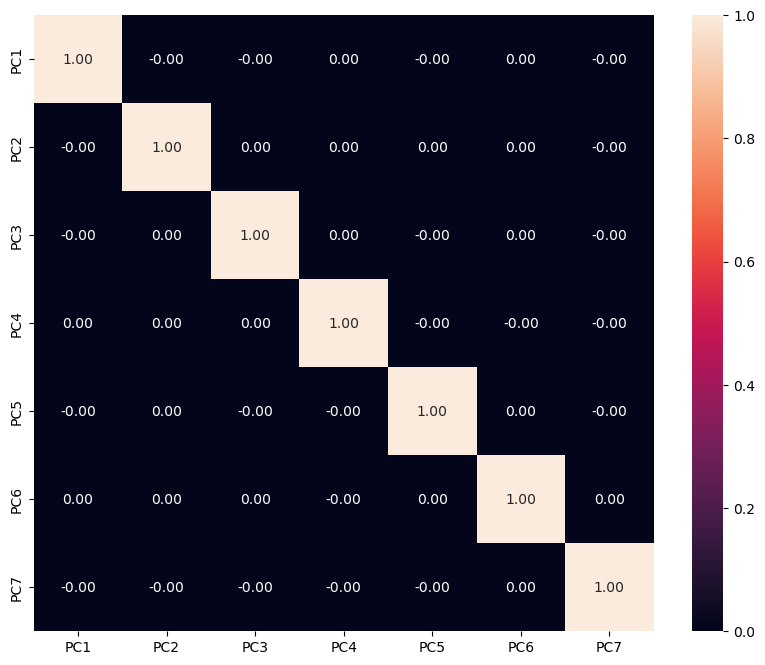

In [80]:
#Check for presence of correlations among the PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

### 2.8 Part 2 - PCA: PCA Equation

Write linear equation for first PC. (2)

In [81]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")",'*',df_pca_scaled.columns[i], end=' + ')

( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + ( 0.15 ) * F_SC + ( 0.03 ) * M_ST + ( 0.03 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.16 ) * M_ILL + ( 0.17 ) * F_ILL + ( 0.16 ) * TOT_WORK_M + ( 0.15 ) * TOT_WORK_F + ( 0.15 ) * MAINWORK_M + ( 0.12 ) * MAINWORK_F + ( 0.1 ) * MAIN_CL_M + ( 0.07 ) * MAIN_CL_F + ( 0.11 ) * MAIN_AL_M + ( 0.07 ) * MAIN_AL_F + ( 0.13 ) * MAIN_HH_M + ( 0.08 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.11 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.16 ) * MARGWORK_F + ( 0.08 ) * MARG_CL_M + ( 0.05 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.11 ) * MARG_AL_F + ( 0.14 ) * MARG_HH_M + ( 0.13 ) * MARG_HH_F + ( 0.16 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.17 ) * MARG_CL_3_6_M + ( 0.16 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.05 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.14 ) * MARG_OT_3_6_M + ( 0

End